In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
def vis_data(data, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2])
    ax.set_xlabel(name)
    ax.set_ylabel('alt')
    ax.set_zlabel('tgo')
    plt.show()

In [36]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

def vis_data_grouped(data, name, groupby='alt'):
    fig, ax = plt.subplots()

    if groupby == 'alt':
        group_ranges = np.arange(0, np.max(data[:, 1]), 250)
    elif groupby == 'tgo':
        group_ranges = np.arange(0, np.max(data[:, 2]), 20)
    else:
        raise ValueError(f'Invalid groupby: {groupby}')

    # Define colors for each group
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in range(len(group_ranges)-1):
        if groupby == 'alt':
            # Group data based on altitude ranges
            group = data[(data[:, 1] >= group_ranges[i]) & (data[:, 1] < group_ranges[i+1])]
        elif groupby == 'tgo':
            # Group data based on tgo ranges
            group = data[(data[:, 2] >= group_ranges[i]) & (data[:, 2] < group_ranges[i+1])]

        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [0, 2]])
            for s in hull.simplices:
                ax.plot(group[s, 0], group[s, 2], color=colors[i % len(colors)])
            
            # Annotation for each group
            if groupby == 'alt':
                ax.text(np.mean(group[:, 0]), np.mean(group[:, 2]), f'{group_ranges[i]}-{group_ranges[i+1]}m', color=colors[i % len(colors)])
            elif groupby == 'tgo':
                ax.text(np.mean(group[:, 0]), np.mean(group[:, 2]), f'{group_ranges[i]}-{group_ranges[i+1]}s', color=colors[i % len(colors)])

    ax.set_xlabel(name)
    if groupby == 'alt':
        ax.set_ylabel('tgo')
    elif groupby == 'tgo':
        ax.set_ylabel('alt')
    plt.show()

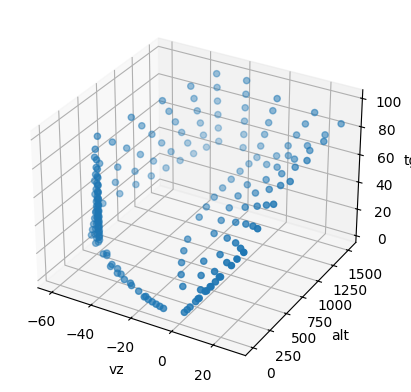

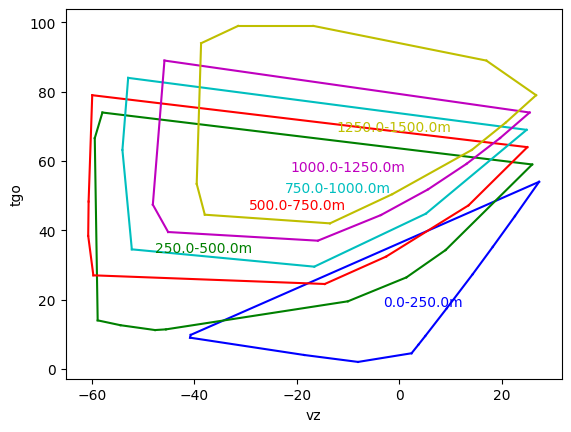

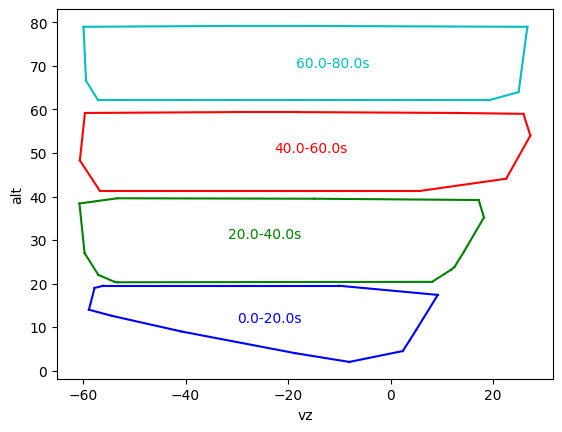

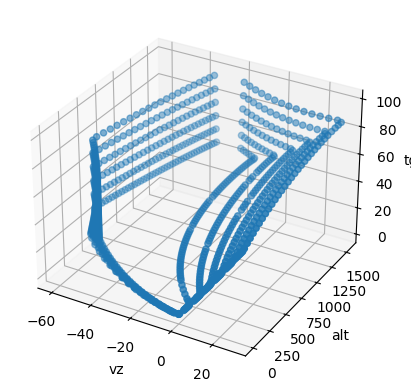

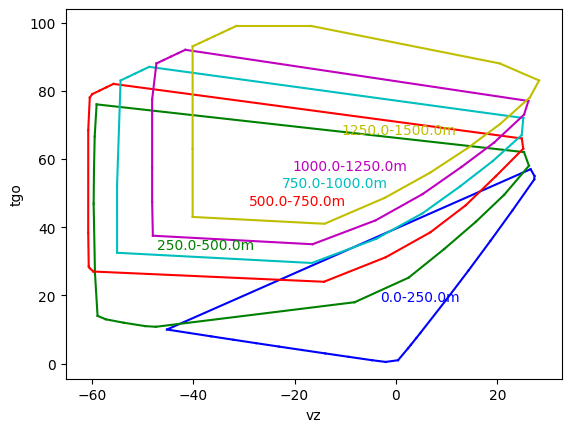

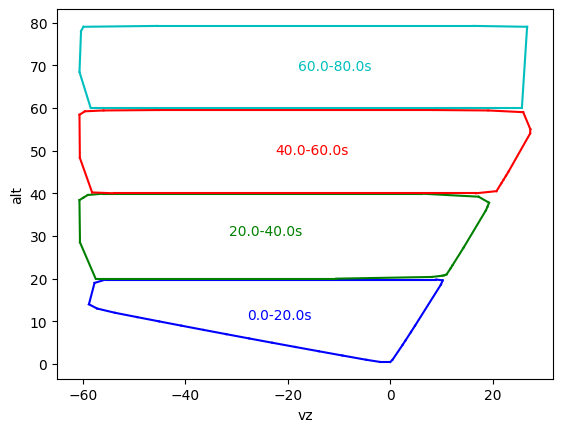

In [44]:
vz_data = np.load("../out/vz_data_new.npy")
vis_data(vz_data, "vz")
vis_data_grouped(vz_data, "vz", groupby='alt')
vis_data_grouped(vz_data, "vz", groupby='tgo')

vz_data = np.load("../out/vz_data.npy")
vis_data(vz_data, "vz")
vis_data_grouped(vz_data, "vz", groupby='alt')
vis_data_grouped(vz_data, "vz", groupby='tgo')

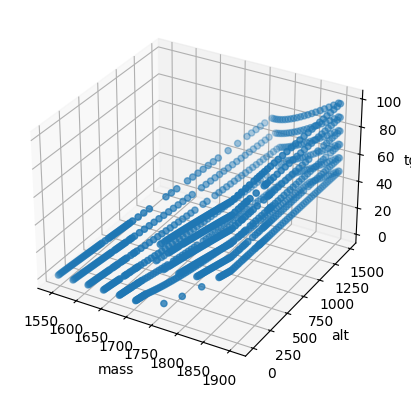

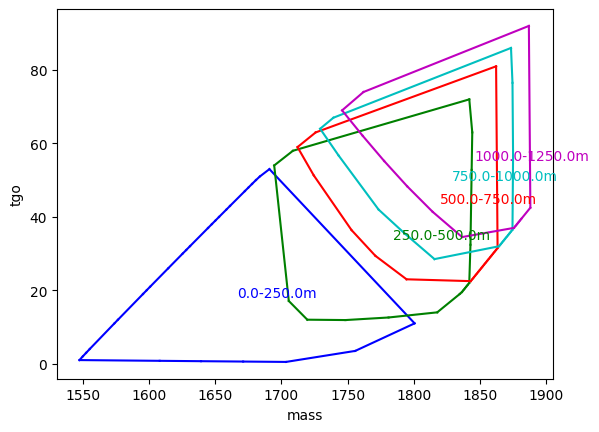

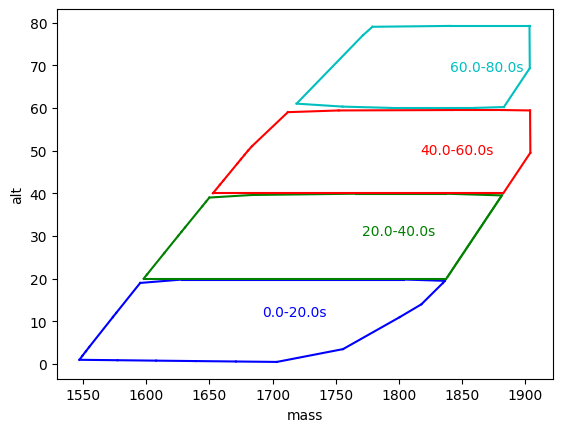

In [31]:
mass_data = np.load("../out/mass_data.npy")
vis_data(mass_data, "mass")
vis_data_grouped(mass_data, "mass", groupby='alt')
vis_data_grouped(mass_data, "mass", groupby='tgo')

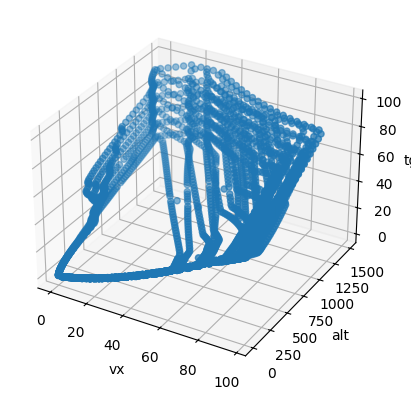

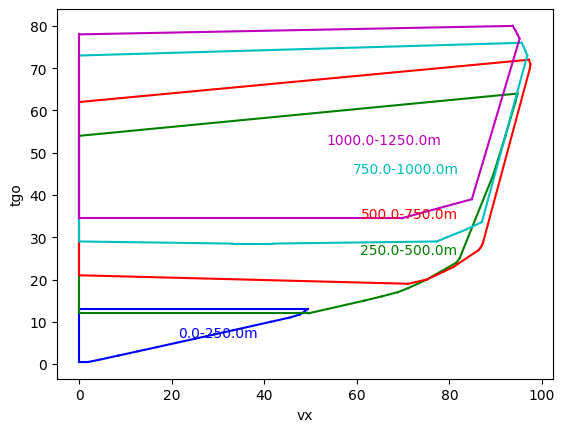

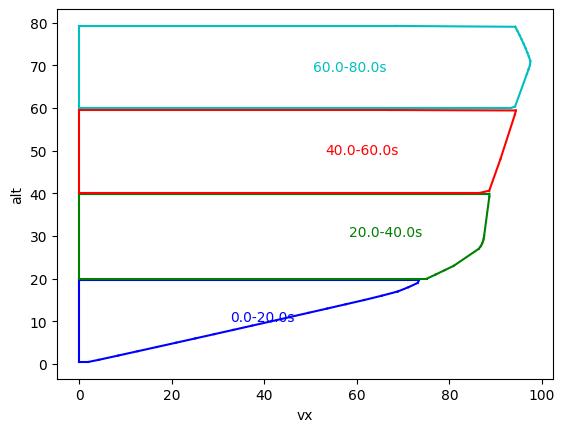

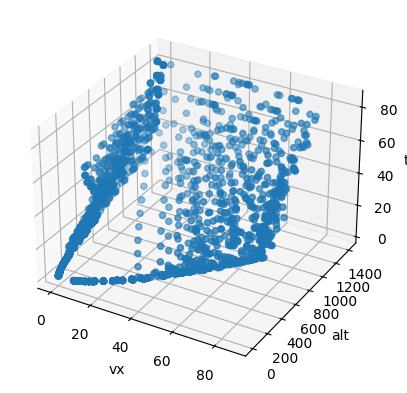

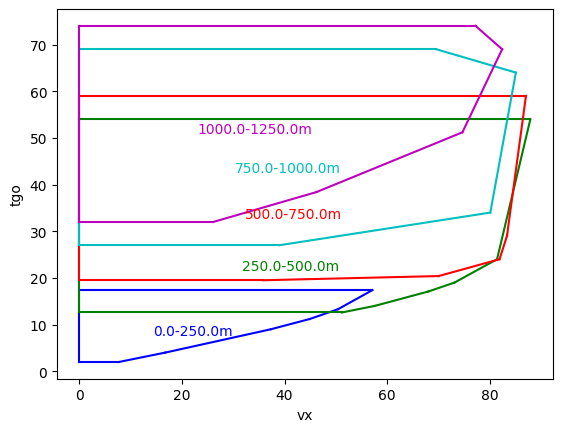

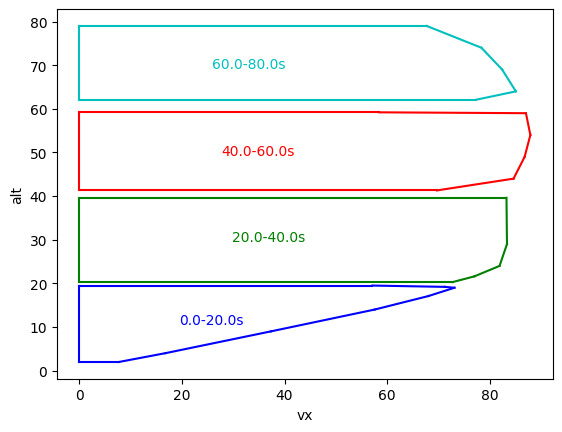

In [46]:
vx_data = np.load("../out/vx_data.npy")
vis_data(vx_data, "vx")
vis_data_grouped(vx_data, "vx", groupby='alt')
vis_data_grouped(vx_data, "vx", groupby='tgo')

vx_data = np.load("../out/vx_data_new.npy")
vis_data(vx_data, "vx")
vis_data_grouped(vx_data, "vx", groupby='alt')
vis_data_grouped(vx_data, "vx", groupby='tgo')

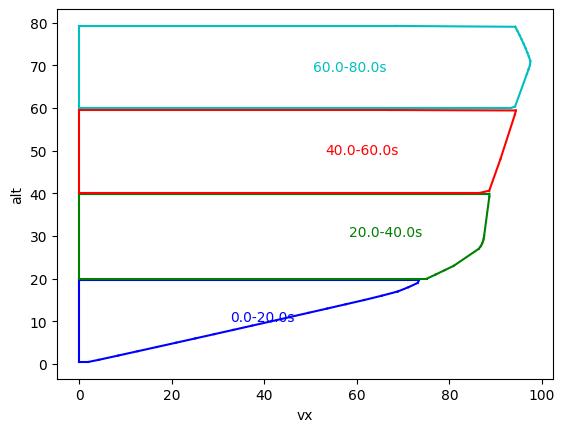

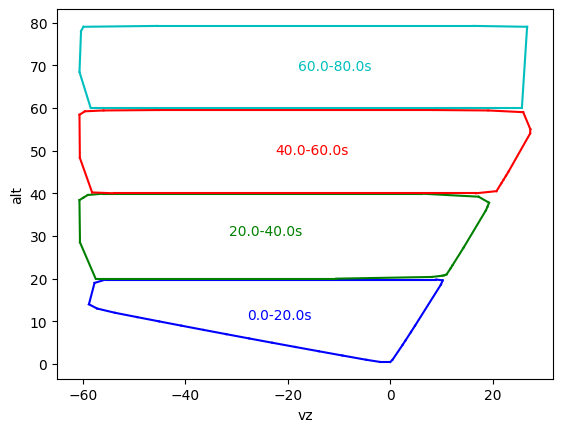

In [33]:
vis_data_grouped(vx_data, "vx", groupby='tgo')
vis_data_grouped(vz_data, "vz", groupby='tgo')